# Arkadiusz Pytlik

### Rozwiązanie: 

###  1) Zaimportuj niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [1]:
import numpy as np
from pmdarima import model_selection
import pmdarima as pm
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline


### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [2]:
df = pd.read_csv("analiza.csv", sep = ",", decimal = ",")
df.head(7)

,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [3]:
len(df)

144

In [4]:
df.describe()

,Rezerwacja
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.shape

(144, 2)

### 3) Wykonaj wstępny wykres uzyskanych danych 


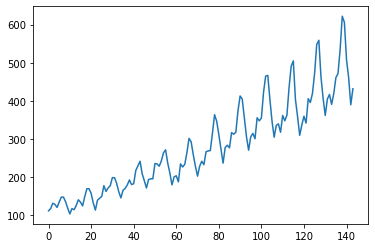

In [6]:
reserv=df['Rezerwacja']
reserv.head()
plt.plot(reserv)
plt.show()

### 4) Oblicz ADF

In [7]:
#ADF rozszerzony Test Dickeya-Fullera dla sprawdzenia stacjonarności

df = pd.read_csv('analiza.csv', header=0, index_col=0)
result = adfuller(df.values)
print('ADF Statistic: %f' % result[1])
print('p-value: %f' % result[0])

ADF Statistic: 0.991880
p-value: 0.815369


### 5) Wykonaj wykres ACF


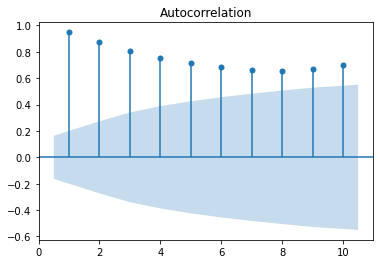

In [8]:
#ACF wykres funkcji autokorelacji 

plot_acf(df, zero=False, lags=10)
plt.show()

### 6) Wykonaj wykres PACF


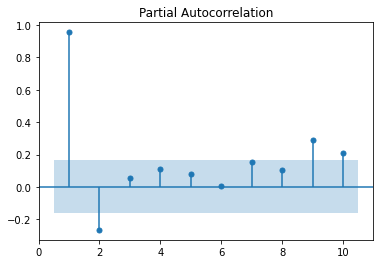

In [9]:
#PACF - wykres częsciowej funkcji autokorelacji
plot_pacf(df, zero=False, lags=10)
plt.show()

### 7) Podziel szereg na dane treningowe i testowe wędlug uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

In [10]:
#ARIMA

X = reserv.values
train = X[0:106] # dane treningowe
test = X[106:]  #dane testowe
predictions = [train, test]
model = ARIMA(reserv, order=(3,0,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Rezerwacja   No. Observations:                  144
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -698.144
Date:                Wed, 08 Dec 2021   AIC                           1408.288
Time:                        18:40:02   BIC                           1426.107
Sample:                             0   HQIC                          1415.528
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3011     58.857      4.762      0.000     164.944     395.658
ar.L1          0.5019      0.133      3.776      0.000       0.241       0.762
ar.L2          0.5505      0.157      3.506      0.0

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [11]:
#AUTO-ARIMA
pmaa=pm.auto_arima(reserv, exogenous=None, seasonal=False, m=1, d=1, D=1,   #pm.auto.arima
                     max_p=4, max_q=3, trace=True, error_action='ignore', 
                     suppress_warning=True)

print(pmaa.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

# Wykonaj wykres prognozy

C:\Users\User\anaconda3\envs\arekpytlik\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


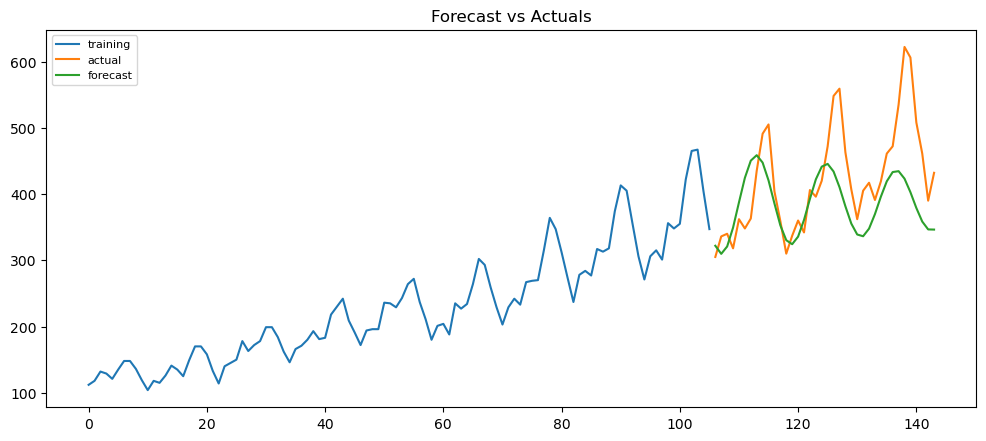

In [12]:
model = ARIMA(train, order=(4, 1, 3))  
fitted = model.fit()  

fc = fitted.forecast(len(test), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=reserv[106:].index)
test_series = pd.Series(test, index=reserv[106:].index)

# wykres
plt.figure(figsize=(12,5), dpi=100)
plt.plot(reserv[0:106], label='training')
plt.plot(reserv[106:], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Wnioski

Na około 20 próbek do przodu, prognoza jest nie najgorsza. Dla kolejnych zaczyna się coraz bardziej rozmijć z wartościami rzeczywistymi.